# 4. Creating Machine Learning Models

## 4.1 Import the Libs

In [1]:
import pandas as pd
import requests
import lxml
from bs4 import BeautifulSoup
import time
import pyodbc
import numpy as np
from urllib.error import URLError, HTTPError
from urllib.request import Request, urlopen
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import matplotlib.pyplot as plt

## 4.2 Reading data From Database

In [2]:
# Function Select
def SQLSelect(query):
    conn = pyodbc.connect('Trusted_Connection=yes',
                      driver = '{ODBC Driver 17 for SQL Server}',
                      server = 'localhost',
                      database = 'MLS_Project')
    out = pd.read_sql_query(query,conn)
    return out

query_all_MatchDetails = '''
    Select 
    * 
    from TableMatchDetailsFull
'''

def SQLTruncate(TableName):
    conn = pyodbc.connect('Trusted_Connection=yes',
                          driver = '{ODBC Driver 17 for SQL Server}',
                          server = 'localhost',
                          database = 'MLS_Project')

    cursor = conn.cursor()

    cursor.execute(f'''
    
                   TRUNCATE TABLE {TableName}
                     
                   ''')
    conn.commit()
    cursor.close()

In [3]:
df_MatchDetailsFull_v01 = SQLSelect(query_all_MatchDetails)
df_MatchDetailsFull_v01 = df_MatchDetailsFull_v01.astype({'GAME_Time':'str'})
df_MatchDetailsFull_v01['GAME_Time'] = df_MatchDetailsFull_v01['GAME_Time'].str[:2]
df_MatchDetailsFull_v01 = df_MatchDetailsFull_v01.astype({'GAME_Time':'int'})

df_MatchDetailsFull_v01

,Generalkey,GAME_Date,GAME_Time,WEEK_DAY,TEAM_AWAY,TEAM_HOME,RESULT_GAME,SEASON,SEASON_BEFORE,HOME_SB_RK,...,HOME_SB_W_MP,HOME_SB_D_MP,HOME_SB_L_MP,HOME_SB_GD_MP,AWAY_SB_RK,AWAY_SB_PTS_MP,AWAY_SB_W_MP,AWAY_SB_D_MP,AWAY_SB_L_MP,AWAY_SB_GD_MP
0,1,2020-02-29,19,Sat,Sporting-KC,Vancouver-Whitecaps-FC,A,2020,2019,12.0,...,0.235294,0.294118,0.470588,-0.647059,11.0,1.12,0.294118,0.235294,0.470588,-0.529412
1,2,2020-03-07,19,Sat,Houston-Dynamo,Sporting-KC,H,2020,2019,11.0,...,0.294118,0.235294,0.470588,-0.529412,10.0,1.18,0.352941,0.117647,0.529412,-0.294118
2,3,2020-08-21,18,Fri,Sporting-KC,Minnesota-United,A,2020,2019,4.0,...,0.441176,0.235294,0.323529,0.264706,11.0,1.12,0.294118,0.235294,0.470588,-0.529412
3,4,2020-08-25,19,Tue,Houston-Dynamo,Sporting-KC,A,2020,2019,11.0,...,0.294118,0.235294,0.470588,-0.529412,10.0,1.18,0.352941,0.117647,0.529412,-0.294118
4,5,2020-08-29,19,Sat,Sporting-KC,Colorado-Rapids,D,2020,2019,9.0,...,0.352941,0.176471,0.470588,-0.147059,11.0,1.12,0.294118,0.235294,0.470588,-0.529412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,3193,2023-04-29,19,Sat,Charlotte-FC,DC-United,F,2023,2022,14.0,...,0.205882,0.176471,0.617647,-1.029412,9.0,1.24,0.382353,0.088235,0.529412,-0.235294
3193,3194,2023-05-31,19,Wed,CF-Montreal,DC-United,F,2023,2022,14.0,...,0.205882,0.176471,0.617647,-1.029412,2.0,1.91,0.588235,0.147059,0.264706,0.382353
3194,3195,2023-09-16,19,Sat,DC-United,Charlotte-FC,F,2023,2022,9.0,...,0.382353,0.088235,0.529412,-0.235294,14.0,0.79,0.205882,0.176471,0.617647,-1.029412
3195,3196,2023-06-24,19,Sat,CF-Montreal,Charlotte-FC,F,2023,2022,9.0,...,0.382353,0.088235,0.529412,-0.235294,2.0,1.91,0.588235,0.147059,0.264706,0.382353


In [4]:


df_MatchDetailsFull_v02 = df_MatchDetailsFull_v01.iloc[:,[6,9,10,11,12,13,14,15,16,17,18,19,20,7,1,4,5]]
# Change weekday in int (future update)
df_MatchDetailsFull_v02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RESULT_GAME     3197 non-null   object 
 1   HOME_SB_RK      3197 non-null   float64
 2   HOME_SB_PTS_MP  3197 non-null   float64
 3   HOME_SB_W_MP    3197 non-null   float64
 4   HOME_SB_D_MP    3197 non-null   float64
 5   HOME_SB_L_MP    3197 non-null   float64
 6   HOME_SB_GD_MP   3197 non-null   float64
 7   AWAY_SB_RK      3197 non-null   float64
 8   AWAY_SB_PTS_MP  3197 non-null   float64
 9   AWAY_SB_W_MP    3197 non-null   float64
 10  AWAY_SB_D_MP    3197 non-null   float64
 11  AWAY_SB_L_MP    3197 non-null   float64
 12  AWAY_SB_GD_MP   3197 non-null   float64
 13  SEASON          3197 non-null   int64  
 14  GAME_Date       3197 non-null   object 
 15  TEAM_AWAY       3197 non-null   object 
 16  TEAM_HOME       3197 non-null   object 
dtypes: float64(12), int64(1), object(

In [5]:
#Check for NaN in Result Game
df_MatchDetailsFull_v02.groupby(['RESULT_GAME','SEASON'])['SEASON'].count().unstack(level = 0)

RESULT_GAME,A,D,F,H
SEASON,,,,
2016,64.0,107.0,NaN,169.0
2017,76.0,90.0,NaN,208.0
2018,97.0,83.0,NaN,211.0
2019,103.0,92.0,NaN,213.0
2020,70.0,59.0,NaN,127.0
2021,115.0,124.0,NaN,220.0
2022,126.0,118.0,NaN,232.0
2023,NaN,NaN,493.0,NaN


In [6]:
df_MatchDetailsFull_v02.groupby(['RESULT_GAME'])['RESULT_GAME'].count()

RESULT_GAME
A     651
D     673
F     493
H    1380
Name: RESULT_GAME, dtype: int64

In [36]:
df_MatchDetailsFull_v02.columns

Index(['RESULT_GAME', 'HOME_SB_RK', 'HOME_SB_PTS_MP', 'HOME_SB_W_MP',
       'HOME_SB_D_MP', 'HOME_SB_L_MP', 'HOME_SB_GD_MP', 'AWAY_SB_RK',
       'AWAY_SB_PTS_MP', 'AWAY_SB_W_MP', 'AWAY_SB_D_MP', 'AWAY_SB_L_MP',
       'AWAY_SB_GD_MP', 'SEASON', 'GAME_Date', 'TEAM_AWAY', 'TEAM_HOME'],
      dtype='object')

## 4.3 Split in training and test

All base will be splited in 4 groups
- G01 => Training data: 2016-2019 and Testing Data: 2020
- G02 => Training data: 2016-2020 and Testing Data: 2021
- G03 => Training data: 2016-2021 and Testing Data: 2022
- G04 => Training data: 2016-2022 and FORECAST Data: 2023

In [37]:
# Create a scaler to MinMax the features
from sklearn.preprocessing import MinMaxScaler

# Create Min-Max scaler object
scaler = MinMaxScaler()

# Select columns to be scaled
cols_to_scale = ['HOME_SB_RK', 'HOME_SB_PTS_MP', 'HOME_SB_W_MP',
                 'HOME_SB_D_MP', 'HOME_SB_L_MP', 'HOME_SB_GD_MP', 
                 'AWAY_SB_RK','AWAY_SB_PTS_MP', 'AWAY_SB_W_MP', 
                 'AWAY_SB_D_MP', 'AWAY_SB_L_MP','AWAY_SB_GD_MP']

# Apply scaling on selected columns
df_MatchDetailsFull_v02[cols_to_scale] = scaler.fit_transform(df_MatchDetailsFull_v02[cols_to_scale])





In [38]:
# Spliting data

# Creating filters

G01_MatchDetails_train_filter = ((df_MatchDetailsFull_v02['SEASON']<=2019) & (df_MatchDetailsFull_v02['SEASON']>=2016))
G01_MatchDetails_test_filter = (df_MatchDetailsFull_v02['SEASON']==2020)


G02_MatchDetails_train_filter = ((df_MatchDetailsFull_v02['SEASON']<=2020) & (df_MatchDetailsFull_v02['SEASON']>=2016))
G02_MatchDetails_test_filter = (df_MatchDetailsFull_v02['SEASON']==2021)


G03_MatchDetails_train_filter = ((df_MatchDetailsFull_v02['SEASON']<=2021) & (df_MatchDetailsFull_v02['SEASON']>=2016))
G03_MatchDetails_test_filter = (df_MatchDetailsFull_v02['SEASON']==2022)


G04_MatchDetails_train_filter = ((df_MatchDetailsFull_v02['SEASON']<=2022) & (df_MatchDetailsFull_v02['SEASON']>=2016))
G04_MatchDetails_test_filter = (df_MatchDetailsFull_v02['SEASON']==2023)


In [39]:
# Creating dfs
G01_MatchDetails_train =  df_MatchDetailsFull_v02.loc[G01_MatchDetails_train_filter,]
G01_MatchDetails_test = df_MatchDetailsFull_v02.loc[G01_MatchDetails_test_filter,]

G02_MatchDetails_train =  df_MatchDetailsFull_v02.loc[G02_MatchDetails_train_filter,]
G02_MatchDetails_test = df_MatchDetailsFull_v02.loc[G02_MatchDetails_test_filter,]

G03_MatchDetails_train =  df_MatchDetailsFull_v02.loc[G03_MatchDetails_train_filter,]
G03_MatchDetails_test = df_MatchDetailsFull_v02.loc[G03_MatchDetails_test_filter,]

G04_MatchDetails_train =  df_MatchDetailsFull_v02.loc[G04_MatchDetails_train_filter,]
G04_MatchDetails_test = df_MatchDetailsFull_v02.loc[G04_MatchDetails_test_filter,]


In [40]:
G01_MatchDetails_train

,RESULT_GAME,HOME_SB_RK,HOME_SB_PTS_MP,HOME_SB_W_MP,HOME_SB_D_MP,HOME_SB_L_MP,HOME_SB_GD_MP,AWAY_SB_RK,AWAY_SB_PTS_MP,AWAY_SB_W_MP,AWAY_SB_D_MP,AWAY_SB_L_MP,AWAY_SB_GD_MP,SEASON,GAME_Date,TEAM_AWAY,TEAM_HOME
256,H,0.428571,0.448718,0.444444,0.444444,0.550239,0.423913,0.714286,0.482692,0.425000,0.594444,0.420933,0.478261,2017,2017-03-03,Minnesota-United,Portland-Timbers
257,A,0.142857,0.602564,0.444444,0.888889,0.110048,0.641304,0.428571,0.448718,0.444444,0.444444,0.550239,0.423913,2017,2017-03-12,Portland-Timbers,LA-Galaxy
258,H,0.428571,0.448718,0.444444,0.444444,0.550239,0.423913,0.642857,0.262821,0.166667,0.722222,0.550239,0.413043,2017,2017-03-18,Houston-Dynamo,Portland-Timbers
259,H,0.571429,0.301282,0.222222,0.666667,0.550239,0.391304,0.428571,0.448718,0.444444,0.444444,0.550239,0.423913,2017,2017-03-25,Portland-Timbers,Columbus-Crew
260,D,0.428571,0.448718,0.444444,0.444444,0.550239,0.423913,0.428571,0.416667,0.388889,0.500000,0.550239,0.369565,2017,2017-04-02,New-England-Revolution,Portland-Timbers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,H,0.642857,0.358974,0.333333,0.500000,0.605263,0.271739,0.000000,0.923077,0.888889,0.500000,0.055024,0.880435,2018,2018-07-14,Toronto-FC,Orlando-City
2700,A,0.142857,0.660256,0.666667,0.388889,0.385167,0.630435,0.000000,0.923077,0.888889,0.500000,0.055024,0.880435,2018,2018-07-21,Toronto-FC,Chicago-Fire
2701,H,0.000000,0.923077,0.888889,0.500000,0.055024,0.880435,0.142857,0.660256,0.666667,0.388889,0.385167,0.630435,2018,2018-07-28,Chicago-Fire,Toronto-FC
2702,A,0.642857,0.358974,0.333333,0.500000,0.605263,0.271739,0.142857,0.660256,0.666667,0.388889,0.385167,0.630435,2018,2018-05-26,Chicago-Fire,Orlando-City


In [41]:
G04_MatchDetails_test

,RESULT_GAME,HOME_SB_RK,HOME_SB_PTS_MP,HOME_SB_W_MP,HOME_SB_D_MP,HOME_SB_L_MP,HOME_SB_GD_MP,AWAY_SB_RK,AWAY_SB_PTS_MP,AWAY_SB_W_MP,AWAY_SB_D_MP,AWAY_SB_L_MP,AWAY_SB_GD_MP,SEASON,GAME_Date,TEAM_AWAY,TEAM_HOME
2704,F,0.071429,0.679487,0.666667,0.444444,0.330144,0.652174,1.000000,0.503892,0.488095,0.468254,0.483424,0.478261,2023,2023-02-25,St-Louis-City,Austin-FC
2705,F,1.000000,0.503892,0.488095,0.468254,0.483424,0.478261,0.571429,0.416667,0.500000,0.166667,0.770335,0.391304,2023,2023-03-04,Charlotte-FC,St-Louis-City
2706,F,0.500000,0.487179,0.388889,0.722222,0.330144,0.478261,1.000000,0.503892,0.488095,0.468254,0.483424,0.478261,2023,2023-03-11,St-Louis-City,Portland-Timbers
2707,F,1.000000,0.503892,0.488095,0.468254,0.483424,0.478261,0.928571,0.282051,0.222222,0.611111,0.605263,0.293478,2023,2023-03-18,San-Jose-Earthquakes,St-Louis-City
2708,F,0.428571,0.506410,0.444444,0.611111,0.385167,0.456522,1.000000,0.503892,0.488095,0.468254,0.483424,0.478261,2023,2023-03-25,St-Louis-City,Real-Salt-Lake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,F,0.928571,0.128205,0.166667,0.333333,0.935407,0.097826,0.571429,0.416667,0.500000,0.166667,0.770335,0.391304,2023,2023-04-29,Charlotte-FC,DC-United
3193,F,0.928571,0.128205,0.166667,0.333333,0.935407,0.097826,0.071429,0.846154,0.888889,0.277778,0.275120,0.619565,2023,2023-05-31,CF-Montreal,DC-United
3194,F,0.571429,0.416667,0.500000,0.166667,0.770335,0.391304,0.928571,0.128205,0.166667,0.333333,0.935407,0.097826,2023,2023-09-16,DC-United,Charlotte-FC
3195,F,0.571429,0.416667,0.500000,0.166667,0.770335,0.391304,0.071429,0.846154,0.888889,0.277778,0.275120,0.619565,2023,2023-06-24,CF-Montreal,Charlotte-FC


In [42]:
G01_MatchDetails_train.info()

G01_X_train = G01_MatchDetails_train.iloc[:,1:12]
G01_y_train = G01_MatchDetails_train.iloc[:,0]
G01_X_test = G01_MatchDetails_test.iloc[:,1:12]
G01_y_test = G01_MatchDetails_test.iloc[:,0]

G02_X_train = G02_MatchDetails_train.iloc[:,1:12]
G02_y_train = G02_MatchDetails_train.iloc[:,0]
G02_X_test = G02_MatchDetails_test.iloc[:,1:12]
G02_y_test = G02_MatchDetails_test.iloc[:,0]

G03_X_train = G03_MatchDetails_train.iloc[:,1:12]
G03_y_train = G03_MatchDetails_train.iloc[:,0]
G03_X_test = G03_MatchDetails_test.iloc[:,1:12]
G03_y_test = G03_MatchDetails_test.iloc[:,0]

G04_X_train = G04_MatchDetails_train.iloc[:,1:12]
G04_y_train = G04_MatchDetails_train.iloc[:,0]
G04_X_test = G04_MatchDetails_test.iloc[:,1:12]
G04_y_test = G04_MatchDetails_test.iloc[:,0]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1513 entries, 256 to 2703
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RESULT_GAME     1513 non-null   object 
 1   HOME_SB_RK      1513 non-null   float64
 2   HOME_SB_PTS_MP  1513 non-null   float64
 3   HOME_SB_W_MP    1513 non-null   float64
 4   HOME_SB_D_MP    1513 non-null   float64
 5   HOME_SB_L_MP    1513 non-null   float64
 6   HOME_SB_GD_MP   1513 non-null   float64
 7   AWAY_SB_RK      1513 non-null   float64
 8   AWAY_SB_PTS_MP  1513 non-null   float64
 9   AWAY_SB_W_MP    1513 non-null   float64
 10  AWAY_SB_D_MP    1513 non-null   float64
 11  AWAY_SB_L_MP    1513 non-null   float64
 12  AWAY_SB_GD_MP   1513 non-null   float64
 13  SEASON          1513 non-null   int64  
 14  GAME_Date       1513 non-null   object 
 15  TEAM_AWAY       1513 non-null   object 
 16  TEAM_HOME       1513 non-null   object 
dtypes: float64(12), int64(1), objec

## 4.4 Using GridSearchCV for tunning Hyperparameters

In [44]:
# Using GridSearchCV for tunning Hyperparameters

# ---------------------------------------------------------------- #
# defining Hyperparameters for SVM
from sklearn.model_selection import GridSearchCV
# Instantiate an RBF SVM
svm = SVC()

parameters = {'C':[0.5, 0.1, 1, 5, 10], 'gamma':[0.00001, 0.005, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(G03_X_train, G03_y_train)

print('---------------------------------------------')
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid for SVM:", searcher.score(G03_X_test, G03_y_test))
print('---------------------------------------------')
# ---------------------------------------------------------------- #

# defining Hyperparameters for SGDClassifier
from sklearn.linear_model import SGDClassifier
linear_classifier = SGDClassifier(random_state=0)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge', 'log_loss']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(G03_X_train, G03_y_train)

print('---------------------------------------------')
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid for SGDClassifier:", searcher.score(G03_X_test, G03_y_test))
print('---------------------------------------------')

---------------------------------------------
Best CV params {'C': 0.5, 'gamma': 1e-05}
Best CV accuracy 0.5152597369879579
Test accuracy of best grid for SVM: 0.48739495798319327
---------------------------------------------
---------------------------------------------
Best CV params {'alpha': 0.01, 'loss': 'hinge'}
Best CV accuracy 0.5152627964287158
Test accuracy of best grid for SGDClassifier: 0.4894957983193277
---------------------------------------------


## 4.5 Creating a listo of models to Fit

In [45]:
## Testing models to G01 with multiclass classifications

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb #xgb.XGBClassifier(objective="multi:softmax")

from sklearn.metrics import confusion_matrix
from sklearn import metrics

classifiers = [KNeighborsClassifier(n_neighbors=6),
               LogisticRegression(multi_class="ovr"),
               LogisticRegression(multi_class="multinomial"), 
               SGDClassifier(alpha=0.01, loss='hinge'),
               SVC(C=0.5, gamma=0.0001), 
               LinearSVC(), 
               DecisionTreeClassifier(),
               RandomForestClassifier(n_estimators=5000), 
               GaussianNB(),
               AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500),
               GradientBoostingClassifier()
               #xgb.XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=1000,num_classes=9)
              ]

titles = ['knn', 'lr_ovr', 'lr_mul',
          'sgdc', 'svm', 'svml', 
          'dtree', 'rforest', 'gauss', 
          'adaboost', 'gradboost']


Score_results = pd.DataFrame(columns=['Group','Model','Score_Train', 'Score_Test'])

## 4.6 Fitting the models for Each Group

In [46]:
# Fit the classifiers for G01
for c,n in zip(classifiers,titles):
    c.fit(G01_X_train, G01_y_train)
    YPTest = c.predict(G01_X_test)
    YPTrain = c.predict(G01_X_train)
    exec(f"G01_Score_Train{n} = c.score(G01_X_train, G01_y_train)")
    exec(f"G01_Score_Test{n} = c.score(G01_X_test, G01_y_test)")
    exec(f"G01_Pred_Train_{n} = c.predict(G01_X_train)")
    exec(f"G01_Pred_Test_{n} = c.predict(G01_X_test)")
    exec(f"G01_Actual_Pred_{n} = pd.DataFrame(""{"" 'Actual_H': G01_y_test, 'Predict_H': YPTest})")
    exec(f"G01_Actual_Pred_{n}_CMRes = metrics.classification_report(G01_y_test, YPTest)")
    exec(f"G01_Actual_Pred_{n}_CM = confusion_matrix(G01_y_test, YPTest)")

for n in titles:
    exec(f"Model_score_train = G01_Score_Train{n}")
    exec(f"Model_score_test = G01_Score_Test{n}")
    Score_results2 = pd.DataFrame({'Group':'G01','Model' : n, 
                                   'Score_Train': Model_score_train, 
                                   'Score_Test': Model_score_test}, index=[0])
    Score_results = Score_results.append(Score_results2, ignore_index=True)

In [47]:
# Fit the classifiers for G02
for c,n in zip(classifiers,titles):
    c.fit(G02_X_train, G02_y_train)
    YPTest = c.predict(G02_X_test)
    YPTrain = c.predict(G02_X_train)
    exec(f"G02_Score_Train{n} = c.score(G02_X_train, G02_y_train)")
    exec(f"G02_Score_Test{n} = c.score(G02_X_test, G02_y_test)")
    exec(f"G02_Pred_Train_{n} = c.predict(G02_X_train)")
    exec(f"G02_Pred_Test_{n} = c.predict(G02_X_test)")
    exec(f"G02_Actual_Pred_{n} = pd.DataFrame(""{"" 'Actual_H': G02_y_test, 'Predict_H': YPTest})")
    exec(f"G02_Actual_Pred_{n}_CMRes = metrics.classification_report(G02_y_test, YPTest)")
    exec(f"G02_Actual_Pred_{n}_CM = confusion_matrix(G02_y_test, YPTest)")

for n in titles:
    exec(f"Model_score_train = G02_Score_Train{n}")
    exec(f"Model_score_test = G02_Score_Test{n}")
    Score_results2 = pd.DataFrame({'Group':'G02','Model' : n, 
                                   'Score_Train': Model_score_train, 
                                   'Score_Test': Model_score_test}, index=[0])
    Score_results = Score_results.append(Score_results2, ignore_index=True)  

In [48]:
# Fit the classifiers for G03
for c,n in zip(classifiers,titles):
    c.fit(G03_X_train, G03_y_train)
    YPTest = c.predict(G03_X_test)
    YPTrain = c.predict(G03_X_train)
    exec(f"G03_Score_Train{n} = c.score(G03_X_train, G03_y_train)")
    exec(f"G03_Score_Test{n} = c.score(G03_X_test, G03_y_test)")
    exec(f"G03_Pred_Train_{n} = c.predict(G03_X_train)")
    exec(f"G03_Pred_Test_{n} = c.predict(G03_X_test)")
    exec(f"G03_Actual_Pred_{n} = pd.DataFrame(""{"" 'Actual_H': G03_y_test, 'Predict_H': YPTest})")
    exec(f"G03_Actual_Pred_{n}_CMRes = metrics.classification_report(G03_y_test, YPTest)")
    exec(f"G03_Actual_Pred_{n}_CM = confusion_matrix(G03_y_test, YPTest)")

for n in titles:
    exec(f"Model_score_train = G03_Score_Train{n}")
    exec(f"Model_score_test = G03_Score_Test{n}")
    Score_results2 = pd.DataFrame({'Group':'G03','Model' : n, 
                                   'Score_Train': Model_score_train, 
                                   'Score_Test': Model_score_test}, index=[0])
    Score_results = Score_results.append(Score_results2, ignore_index=True)  

In [49]:
# Fit the classifiers for G04
for c,n in zip(classifiers,titles):
    c.fit(G04_X_train, G04_y_train)
    YPTest = c.predict(G04_X_test)
    YPTrain = c.predict(G04_X_train)
    exec(f"G04_Score_Train{n} = c.score(G04_X_train, G04_y_train)")
    exec(f"G04_Score_Test{n} = c.score(G04_X_test, G04_y_test)")
    exec(f"G04_Pred_Train_{n} = c.predict(G04_X_train)")
    exec(f"G04_Pred_Test_{n} = c.predict(G04_X_test)")
    exec(f"G04_Actual_Pred_{n} = pd.DataFrame(""{"" 'Actual_H': G04_y_test, 'Predict_H': YPTest})")
    exec(f"G04_Actual_Pred_{n}_CMRes = metrics.classification_report(G04_y_test, YPTest)")
    exec(f"G04_Actual_Pred_{n}_CM = confusion_matrix(G04_y_test, YPTest)")

for n in titles:
    exec(f"Model_score_train = G04_Score_Train{n}")
    exec(f"Model_score_test = G04_Score_Test{n}")
    Score_results2 = pd.DataFrame({'Group':'G04','Model' : n, 
                                   'Score_Train': Model_score_train, 
                                   'Score_Test': Model_score_test}, index=[0])
    Score_results = Score_results.append(Score_results2, ignore_index=True)


## 4.7 Analysis of Fiting Results

In [55]:
Score_results.groupby(['Model']).mean()
#Score_results

,Score_Train,Score_Test
Model,,
adaboost,0.926236,0.267521
dtree,0.926236,0.272135
gauss,0.490701,0.350517
gradboost,0.609515,0.347373
knn,0.607771,0.303092
lr_mul,0.519792,0.365698
lr_ovr,0.519904,0.366223
rforest,0.926236,0.326446
sgdc,0.520036,0.366223


In [56]:
Score_results[Score_results['Group']=='G04']

,Group,Model,Score_Train,Score_Test
33,G04,knn,0.602811,0.0
34,G04,lr_ovr,0.510355,0.0
35,G04,lr_mul,0.510355,0.0
36,G04,sgdc,0.509985,0.0
37,G04,svm,0.510355,0.0
38,G04,svml,0.510355,0.0
39,G04,dtree,0.930104,0.0
40,G04,rforest,0.930104,0.0
41,G04,gauss,0.474112,0.0
42,G04,adaboost,0.930104,0.0


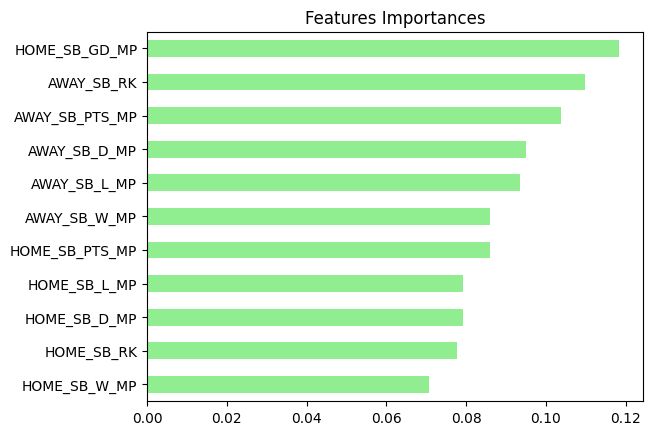

In [58]:
# Create a pd.Series of features importances
rforest = RandomForestClassifier(n_estimators=500)
rforest.fit(G03_X_train, G03_y_train)

importances = pd.Series(data=rforest.feature_importances_,
                        index= G03_X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [24]:
# Confusion Matrix to analysis of Results in G04

for n in titles:
    exec(f"CMRes = G04_Actual_Pred_{n}_CMRes")
    exec(f"CM = G04_Actual_Pred_{n}_CM")
    print("----------------------","Modelo ",n,"----------------------")
    print(CM)
    print(CMRes)
    print("____________________________________________________________\n")


---------------------- Modelo  knn ----------------------
[[  0   0   0   0]
 [  0   0   0   0]
 [129 101   0 263]
 [  0   0   0   0]]
              precision    recall  f1-score   support

           A       0.00      0.00      0.00       0.0
           D       0.00      0.00      0.00       0.0
           F       0.00      0.00      0.00     493.0
           H       0.00      0.00      0.00       0.0

    accuracy                           0.00     493.0
   macro avg       0.00      0.00      0.00     493.0
weighted avg       0.00      0.00      0.00     493.0

____________________________________________________________

---------------------- Modelo  lr_ovr ----------------------
[[  0   0   0]
 [  1   0 492]
 [  0   0   0]]
              precision    recall  f1-score   support

           A       0.00      0.00      0.00       0.0
           F       0.00      0.00      0.00     493.0
           H       0.00      0.00      0.00       0.0

    accuracy                           0.00

## 4.8 Prepare a DataFrame with the forecast

In [59]:
G04_MatchDetails_predict = G04_MatchDetails_test.copy()

titles2= ['knn', 'lr_mul', 'sgdc', 'svm', 'svml', 'dtree', 'rforest', 'gauss','adaboost', 'gradboost']

G04_Pred_Test_knn.tolist()
for n in titles2:
    exec(f"G04_MatchDetails_predict['{n}'] = G04_Pred_Test_{n}.tolist()")
    


In [60]:
G04_MatchDetails_predict.iloc[:,13:]

,SEASON,GAME_Date,TEAM_AWAY,TEAM_HOME,knn,lr_mul,sgdc,svm,svml,dtree,rforest,gauss,adaboost,gradboost
2704,2023,2023-02-25,St-Louis-City,Austin-FC,H,H,H,H,H,H,H,H,H,H
2705,2023,2023-03-04,Charlotte-FC,St-Louis-City,H,H,H,H,H,H,H,H,D,H
2706,2023,2023-03-11,St-Louis-City,Portland-Timbers,H,H,H,H,H,H,H,H,H,H
2707,2023,2023-03-18,San-Jose-Earthquakes,St-Louis-City,H,H,H,H,H,H,H,H,H,H
2708,2023,2023-03-25,St-Louis-City,Real-Salt-Lake,H,H,H,H,H,H,H,H,A,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,2023,2023-04-29,Charlotte-FC,DC-United,A,H,H,H,H,H,A,A,H,A
3193,2023,2023-05-31,CF-Montreal,DC-United,A,H,A,H,H,A,A,A,A,A
3194,2023,2023-09-16,DC-United,Charlotte-FC,H,H,H,H,H,A,H,H,A,H
3195,2023,2023-06-24,CF-Montreal,Charlotte-FC,D,H,H,H,H,H,H,A,D,H


In [61]:
G04_MatchDetails_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 2704 to 3196
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RESULT_GAME     493 non-null    object 
 1   HOME_SB_RK      493 non-null    float64
 2   HOME_SB_PTS_MP  493 non-null    float64
 3   HOME_SB_W_MP    493 non-null    float64
 4   HOME_SB_D_MP    493 non-null    float64
 5   HOME_SB_L_MP    493 non-null    float64
 6   HOME_SB_GD_MP   493 non-null    float64
 7   AWAY_SB_RK      493 non-null    float64
 8   AWAY_SB_PTS_MP  493 non-null    float64
 9   AWAY_SB_W_MP    493 non-null    float64
 10  AWAY_SB_D_MP    493 non-null    float64
 11  AWAY_SB_L_MP    493 non-null    float64
 12  AWAY_SB_GD_MP   493 non-null    float64
 13  SEASON          493 non-null    int64  
 14  GAME_Date       493 non-null    object 
 15  TEAM_AWAY       493 non-null    object 
 16  TEAM_HOME       493 non-null    object 
 17  knn             493 non-null   

In [62]:
G04_MatchDetails_predict['Pred_H'] = (G04_MatchDetails_predict.iloc[:,17:27] == 'H').sum(axis=1)
G04_MatchDetails_predict['Pred_A'] = (G04_MatchDetails_predict.iloc[:,17:27] == 'A').sum(axis=1)
G04_MatchDetails_predict['Pred_D'] = (G04_MatchDetails_predict.iloc[:,17:27] == 'D').sum(axis=1)
G04_MatchDetails_predict
                                                                                        

,RESULT_GAME,HOME_SB_RK,HOME_SB_PTS_MP,HOME_SB_W_MP,HOME_SB_D_MP,HOME_SB_L_MP,HOME_SB_GD_MP,AWAY_SB_RK,AWAY_SB_PTS_MP,AWAY_SB_W_MP,...,svm,svml,dtree,rforest,gauss,adaboost,gradboost,Pred_H,Pred_A,Pred_D
2704,F,0.071429,0.679487,0.666667,0.444444,0.330144,0.652174,1.000000,0.503892,0.488095,...,H,H,H,H,H,H,H,10,0,0
2705,F,1.000000,0.503892,0.488095,0.468254,0.483424,0.478261,0.571429,0.416667,0.500000,...,H,H,H,H,H,D,H,9,0,1
2706,F,0.500000,0.487179,0.388889,0.722222,0.330144,0.478261,1.000000,0.503892,0.488095,...,H,H,H,H,H,H,H,10,0,0
2707,F,1.000000,0.503892,0.488095,0.468254,0.483424,0.478261,0.928571,0.282051,0.222222,...,H,H,H,H,H,H,H,10,0,0
2708,F,0.428571,0.506410,0.444444,0.611111,0.385167,0.456522,1.000000,0.503892,0.488095,...,H,H,H,H,H,A,H,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,F,0.928571,0.128205,0.166667,0.333333,0.935407,0.097826,0.571429,0.416667,0.500000,...,H,H,H,A,A,H,A,6,4,0
3193,F,0.928571,0.128205,0.166667,0.333333,0.935407,0.097826,0.071429,0.846154,0.888889,...,H,H,A,A,A,A,A,3,7,0
3194,F,0.571429,0.416667,0.500000,0.166667,0.770335,0.391304,0.928571,0.128205,0.166667,...,H,H,A,H,H,A,H,8,2,0
3195,F,0.571429,0.416667,0.500000,0.166667,0.770335,0.391304,0.071429,0.846154,0.888889,...,H,H,H,H,A,D,H,7,1,2


In [63]:
# create a sample DataFrame
G04_MatchDetails_predict['Pred_H_Perc'] = G04_MatchDetails_predict['Pred_H']/10
G04_MatchDetails_predict['Pred_A_Perc'] = G04_MatchDetails_predict['Pred_A']/10
G04_MatchDetails_predict['Pred_D_Perc'] = G04_MatchDetails_predict['Pred_D']/10
G04_MatchDetails_predict

,RESULT_GAME,HOME_SB_RK,HOME_SB_PTS_MP,HOME_SB_W_MP,HOME_SB_D_MP,HOME_SB_L_MP,HOME_SB_GD_MP,AWAY_SB_RK,AWAY_SB_PTS_MP,AWAY_SB_W_MP,...,rforest,gauss,adaboost,gradboost,Pred_H,Pred_A,Pred_D,Pred_H_Perc,Pred_A_Perc,Pred_D_Perc
2704,F,0.071429,0.679487,0.666667,0.444444,0.330144,0.652174,1.000000,0.503892,0.488095,...,H,H,H,H,10,0,0,1.0,0.0,0.0
2705,F,1.000000,0.503892,0.488095,0.468254,0.483424,0.478261,0.571429,0.416667,0.500000,...,H,H,D,H,9,0,1,0.9,0.0,0.1
2706,F,0.500000,0.487179,0.388889,0.722222,0.330144,0.478261,1.000000,0.503892,0.488095,...,H,H,H,H,10,0,0,1.0,0.0,0.0
2707,F,1.000000,0.503892,0.488095,0.468254,0.483424,0.478261,0.928571,0.282051,0.222222,...,H,H,H,H,10,0,0,1.0,0.0,0.0
2708,F,0.428571,0.506410,0.444444,0.611111,0.385167,0.456522,1.000000,0.503892,0.488095,...,H,H,A,H,9,1,0,0.9,0.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,F,0.928571,0.128205,0.166667,0.333333,0.935407,0.097826,0.571429,0.416667,0.500000,...,A,A,H,A,6,4,0,0.6,0.4,0.0
3193,F,0.928571,0.128205,0.166667,0.333333,0.935407,0.097826,0.071429,0.846154,0.888889,...,A,A,A,A,3,7,0,0.3,0.7,0.0
3194,F,0.571429,0.416667,0.500000,0.166667,0.770335,0.391304,0.928571,0.128205,0.166667,...,H,H,A,H,8,2,0,0.8,0.2,0.0
3195,F,0.571429,0.416667,0.500000,0.166667,0.770335,0.391304,0.071429,0.846154,0.888889,...,H,A,D,H,7,1,2,0.7,0.1,0.2


In [64]:
G04_MatchDetails_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 2704 to 3196
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RESULT_GAME     493 non-null    object 
 1   HOME_SB_RK      493 non-null    float64
 2   HOME_SB_PTS_MP  493 non-null    float64
 3   HOME_SB_W_MP    493 non-null    float64
 4   HOME_SB_D_MP    493 non-null    float64
 5   HOME_SB_L_MP    493 non-null    float64
 6   HOME_SB_GD_MP   493 non-null    float64
 7   AWAY_SB_RK      493 non-null    float64
 8   AWAY_SB_PTS_MP  493 non-null    float64
 9   AWAY_SB_W_MP    493 non-null    float64
 10  AWAY_SB_D_MP    493 non-null    float64
 11  AWAY_SB_L_MP    493 non-null    float64
 12  AWAY_SB_GD_MP   493 non-null    float64
 13  SEASON          493 non-null    int64  
 14  GAME_Date       493 non-null    object 
 15  TEAM_AWAY       493 non-null    object 
 16  TEAM_HOME       493 non-null    object 
 17  knn             493 non-null   

In [65]:
G04_MatchDetails_predictFull = G04_MatchDetails_predict.iloc[:,13:]
G04_MatchDetails_predictFull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 2704 to 3196
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SEASON       493 non-null    int64  
 1   GAME_Date    493 non-null    object 
 2   TEAM_AWAY    493 non-null    object 
 3   TEAM_HOME    493 non-null    object 
 4   knn          493 non-null    object 
 5   lr_mul       493 non-null    object 
 6   sgdc         493 non-null    object 
 7   svm          493 non-null    object 
 8   svml         493 non-null    object 
 9   dtree        493 non-null    object 
 10  rforest      493 non-null    object 
 11  gauss        493 non-null    object 
 12  adaboost     493 non-null    object 
 13  gradboost    493 non-null    object 
 14  Pred_H       493 non-null    int64  
 15  Pred_A       493 non-null    int64  
 16  Pred_D       493 non-null    int64  
 17  Pred_H_Perc  493 non-null    float64
 18  Pred_A_Perc  493 non-null    float64
 19  Pred

## 4.9 Inserting table to the Database

In [66]:
# Create a function to INSERT Table
def SQLInsertTable(TableGamePred):
    base = pd.DataFrame(columns=['SEASON','GAME_Date','TEAM_AWAY','TEAM_HOME',
                                 'knn','lr_mul','sgdc','svm','svml','dtree',
                                 'rforest','gauss','adaboost','gradboost',
                                 'Pred_H','Pred_A','Pred_D','Pred_H_Perc','Pred_A_Perc','Pred_D_Perc'])
    
    TableBase = base.append(TableGamePred).fillna(0)

    conn = pyodbc.connect('Trusted_Connection=yes',
                          driver = '{ODBC Driver 17 for SQL Server}',
                          server = 'localhost',
                          database = 'MLS_Project')

    cursor = conn.cursor()

    for index, row in TableBase.iterrows():

        cursor.execute('''

            INSERT INTO TableMatchDetailsPredict ( 
                GAME_Date,
                TEAM_AWAY,
                TEAM_HOME,
                SEASON,
                
                Model_knn,
                Model_lr_mul,
                Model_sgdc, 
                Model_svm,
                Model_svml,
                Model_dtree,
                Model_rforest,
                Model_gauss,
                Model_adaboost,
                Model_gradboost,
                
                Pred_H,
                Pred_A,
                Pred_D,
                Pred_H_Perc,
                Pred_A_Perc,
                Pred_D_Perc
                
                )
            Values(?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)''', # mesma qtde de variaveis

            row['GAME_Date'],
            row['TEAM_AWAY'],
            row['TEAM_HOME'],
            row['SEASON'],
                       
            row['knn'],
            row['lr_mul'],
            row['sgdc'],
            row['svm'],
            row['svml'],
            row['dtree'],
            row['rforest'],
            row['gauss'],
            row['adaboost'],
            row['gradboost'],
                       
                       
            row['Pred_H'],
            row['Pred_A'],
            row['Pred_D'],
            row['Pred_H_Perc'],
            row['Pred_A_Perc'],
            row['Pred_D_Perc']
        )

    conn.commit()
    cursor.close()

In [67]:
# Function to truncate a table
def SQLTruncate(TableName):
    conn = pyodbc.connect('Trusted_Connection=yes',
                          driver = '{ODBC Driver 17 for SQL Server}',
                          server = 'localhost',
                          database = 'MLS_Project')

    cursor = conn.cursor()

    cursor.execute(f'''
    
                   TRUNCATE TABLE {TableName}
                     
                   ''')
    conn.commit()
    cursor.close()

In [68]:
SQLTruncate('TableMatchDetailsPredict')

In [69]:
SQLInsertTable(G04_MatchDetails_predictFull)